## Disclaimer

This lecture focusses on supervised learning, it will change a bit for unsupervised learning - especially since we do not have labels for unsupervised learning so won't have a 'y' variable.

In [22]:
#!pip import pandas matplotlib seabord scikit-learn

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Step 1: Load the Dataset

In [24]:
# url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
# df = pd.read_csv(url)

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

## Why We Need x and y Variables

In math, we model relationships using functions. A simple example is:

```
y = mx + b
```

y: The dependent variable – its value depends on x.
x: The independent variable – we choose its value.

We need both x and y because:
* Describing Change: The equation lets us calculate y (the outcome) based on a chosen value for x (the input).
* Visualization: When plotting relationships, the x-axis represents the input variable and the y-axis the output variable.

In [25]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
# Add the target (species) column to the DataFrame - this is the 'y' which we want to predict
df['species'] = iris.target 

In [28]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Step 2: Exploritory Data Analysis (EDA)

In [29]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [31]:
df.shape

(150, 5)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [33]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


We'll discuss some advanced exploritory techniques in later lectures.

# Step 3: Data Manipulation

In [34]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [35]:
# Select specific columns
df_selected = df[['species', 'petal length (cm)', 'petal width (cm)']]

In [36]:
# Filter by flower species
df_setosa = df[df['species'] == 'setosa']

In [37]:
# Create a new calculated column
df['petal area (cm^2)'] = df['petal length (cm)'] * df['petal width (cm)']

In [38]:
# Rename a column 
df = df.rename(columns={'sepal length (cm)': 'sepal_len'})

In [39]:
df.head()

,sepal_len,sepal width (cm),petal length (cm),petal width (cm),species,petal area (cm^2)
0,5.1,3.5,1.4,0.2,0,0.28
1,4.9,3.0,1.4,0.2,0,0.28
2,4.7,3.2,1.3,0.2,0,0.26
3,4.6,3.1,1.5,0.2,0,0.30
4,5.0,3.6,1.4,0.2,0,0.28


# Step 4: Analysis with Built-in Python Methods

In [40]:
print(df['petal area (cm^2)'].mean())
print(df['species'].nunique())
print(df.groupby('species')['petal length (cm)'].std())

5.794066666666667
3
species
0    0.173664
1    0.469911
2    0.551895
Name: petal length (cm), dtype: float64


# Step 5: Grouping and Aggregation

In [41]:
df.groupby('species').agg(
    mean_petal_length=('petal length (cm)', 'mean'),
    max_sepal_width=('sepal width (cm)', 'max')
)

,mean_petal_length,max_sepal_width
species,,
0,1.462,4.4
1,4.260,3.4
2,5.552,3.8


# Data Visualization

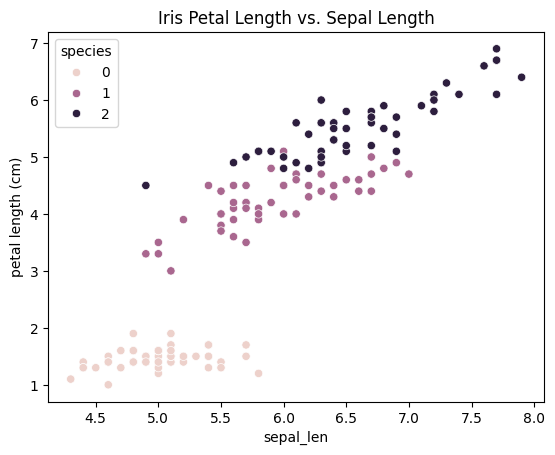

In [42]:
sns.scatterplot(x='sepal_len', y='petal length (cm)', hue='species', data=df)
plt.title('Iris Petal Length vs. Sepal Length')
plt.show()

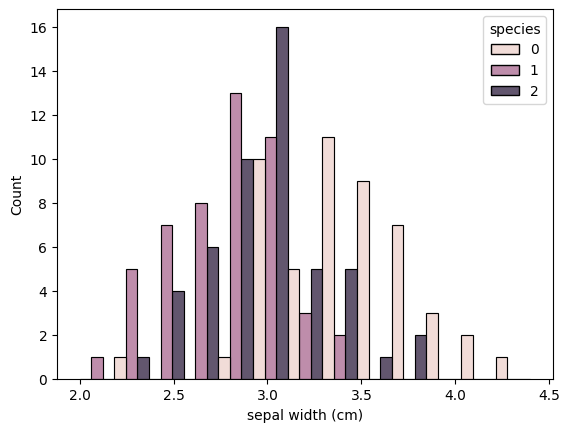

In [43]:
# More visualization: Distribution of sepal width across species
sns.histplot(data=df, x='sepal width (cm)', hue='species', multiple='dodge')
plt.show() 